In [93]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools
import time

In [9]:
class tsp_node():
    
    def __init__(self, data):
        self.data = data

In [10]:
INF = 9999999999999

In [11]:
def node_generator(graph, n):
    # generates a graph with n nodes in it
    for i in range(n):
        graph.add_node(str(i))

In [119]:
def edge_generator(graph):
    # adds edges between each node and every other node in the graph 
    
    
    node_dist = [[0 for node in graph] for node in graph]
    # create matrix for hungarian algorithm
    # will return edge weights for nodes - 
    # for example node_dist[1][2] == node_dist[2][1] and represents edge between nodes 1 and 2
    # diagonal x = -y is always 0
    
    for node1 in graph: 
        node_dist[int(node1)][int(node1)] = INF
        for node2 in graph:
            if node1 != node2 and (node1, node2) not in gr.edges and (node2, node1) not in gr.edges:
                # avoid repeats
                x = np.random.randint(10, 50)
                # generate random weight for edges
                graph.add_edge(node1, node2, weight = x)
                node_dist[int(node1)][int(node2)] = x
                node_dist[int(node2)][int(node1)] = x
               
    return node_dist

In [120]:
def node_labeler(graph):
    # makes graph look nice, shows node value instead of location
    labeldict = {}
    for node in graph:
        labeldict[node] = str(node.data)
    return labeldict

In [254]:
# Implementation of Nearest Neighbor algorithm adapted with calculating distance as edge weights
# Additionally counts the number of comparisons 


def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

#starts at a city, and then always picks the closest neighbor 
#passing in a city to start with, and a graph of tuples (x,y)
def nearest_neighbor_algorithm(starting_city, all_cities, graph):
    #starting with the first city, which will always be visited and part of the tour.
    total_dist = 0
    current_city = starting_city
    visited_cities = []
    visited_cities.append(starting_city)
    tour_list = []
    tour_list.append(starting_city)
    comparisons = 0
    #all of the cities besides starting city
    unvisited = []
    for city in all_cities:
        if city != starting_city:
            unvisited.append(city)
            
    
    #while there are still "cities" unvisited...
    while len(visited_cities) < len(all_cities):
        nearest_neighbor = None
        nearest_distance = float('inf')
        #find a neighbor in a graph that's the smallest distance away

        for neighbor in unvisited:
            if neighbor not in visited_cities:
                distance = graph.get_edge_data(current_city, neighbor)['weight']
                comparisons += 1
                if distance < nearest_distance:
                    
                    nearest_neighbor = neighbor #current neighbor???
                    nearest_distance = distance 
        visited_cities.append(nearest_neighbor)
        tour_list.append(nearest_neighbor)
        current_city = nearest_neighbor
        unvisited.remove(current_city)
        total_dist += nearest_distance
    tour_list.append(starting_city)
    total_dist += graph.get_edge_data(starting_city, neighbor)['weight']

    return  tour_list, total_dist, comparisons

In [241]:
# will sort list of tuples by last index
def last(n):
    return n[-1]
def tuple_sort(tuples):
    return sorted(tuples, key = last)

In [285]:
# check solutions O(n!)
def brute_force_solver(graph):
    # make list of all possible routes
    routes = []
    # make list of the final weight of each route
    route_weights = []
    operations = 0
    
    for node in graph:
        routes.append((node))
    # uses itertools to make list of every possible combination of nodes
    path_list = list(itertools.permutations(routes))
    
    # updates path list to add end point
    for path in path_list:
        pointers += 1
        
        index = path_list.index(path)
        # add start node as end node
        path_list[index] = path + (path[0], )
        route_weight = 0
        num_locations = len(path)
        
        for i in range(num_locations):
            operations += 1
            # calculate total weight of route
            route_weight += graph.get_edge_data(path_list[index][i], path_list[index][i+1])['weight']
        route_weights.append((path_list[index], route_weight))
        
    # return route with smallest weight
    return tuple_sort(route_weights)[0], operations
    

In [251]:
gr = nx.Graph()
node_generator(gr, 7)
edge_generator(gr)
pass

In [255]:
nearest_neighbor_algorithm(list(gr)[0], list(gr), gr)

(['0', '4', '6', '1', '5', '2', '3', '0'], 161, 21)

In [253]:
brute_force_solver(gr)

((('0', '4', '6', '3', '2', '1', '5', '0'), 135), 40320)

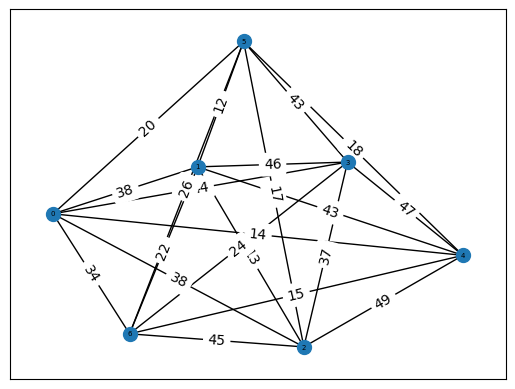

In [256]:
pos = nx.spring_layout(gr, seed = 7)
nx.draw_networkx_nodes(gr, pos, node_size=100)
nx.draw_networkx_edges(gr, pos, width=1)
edge_labels = nx.get_edge_attributes(gr, 'weight')
nx.draw_networkx_edge_labels(gr, pos, edge_labels)
nx.draw_networkx_labels(gr, pos, font_size=5, font_family="sans-serif")
pass

In [279]:
brute_force_nodes = []
brute_force_time = []
brute_force_operations = []
for i in range(4, 9):
    gr = nx.Graph()
    node_generator(gr, i)
    edge_generator(gr)
    pre = time.time()*1000.0
    route, pointers = brute_force_solver(gr)
    post = time.time()*1000.0
    total = post - pre
    brute_force_nodes.append(i)
    brute_force_time.append(total)
    brute_force_pointer_follows.append(pointers)

In [280]:
nearest_neighbor_nodes = []
nearest_neighbor_time = []
nearest_neighbor_comparisons = []
for i in range(4, 9):
    gr = nx.Graph()
    node_generator(gr, i)
    edge_generator(gr)
    pre = time.time()*1000.0
    route, route_dist, comparisons = nearest_neighbor_algorithm(list(gr)[0], list(gr), gr)
    post = time.time()*1000.0
    total = post - pre
    nearest_neighbor_nodes.append(i)
    nearest_neighbor_time.append(total)
    nearest_neighbor_comparisons.append(comparisons)

Text(0.5, 1.0, 'Time to calculate route vs Number of nodes in graph')

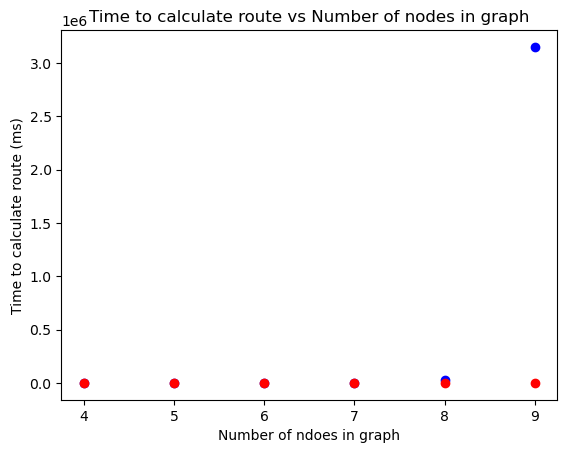

In [281]:
plt.scatter(brute_force_nodes, brute_force_time, color = "b")
plt.scatter(nearest_neighbor_nodes, nearest_neighbor_time, color = "r")
plt.xlabel("Number of ndoes in graph")
plt.ylabel("Time to calculate route (ms)")
plt.title("Time to calculate route vs Number of nodes in graph")

Text(0.5, 1.0, 'operations vs. Number of nodes in graph')

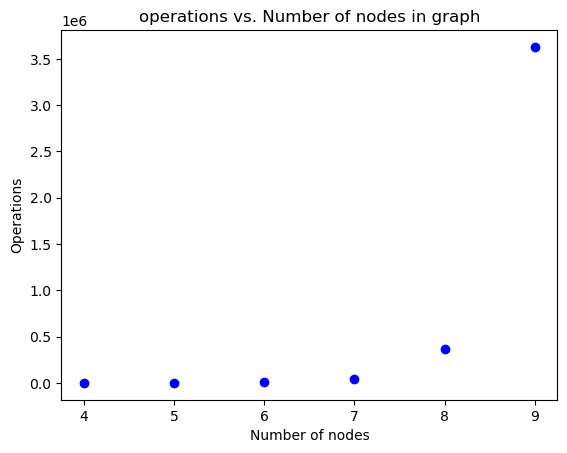

In [284]:
plt.scatter(brute_force_nodes, brute_force_pointer_follows, color = "b")
plt.xlabel("Number of nodes")
plt.ylabel("Operations")
plt.title("operations vs. Number of nodes in graph")

Text(0.5, 1.0, 'Comparisons vs Number of nodes')

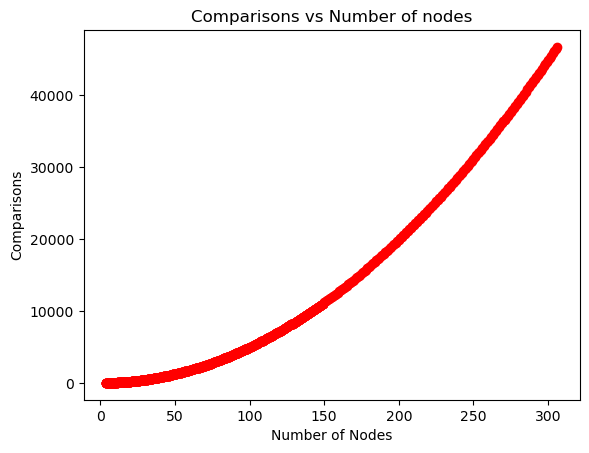

In [278]:
# nearest neighbor is faster, so can run trials with larger graphs to gather data for number of comparisons
for i in range(4, 150):
    gr = nx.Graph()
    node_generator(gr, i)
    edge_generator(gr)
    pre = time.time()*1000.0
    route, route_dist, comparisons = nearest_neighbor_algorithm(list(gr)[0], list(gr), gr)
    post = time.time()*1000.0
    total = post - pre
    nearest_neighbor_nodes.append(i)
    nearest_neighbor_time.append(total)
    nearest_neighbor_comparisons.append(comparisons)
plt.scatter(nearest_neighbor_nodes, nearest_neighbor_comparisons, color = "r")
plt.xlabel("Number of Nodes")
plt.ylabel("Comparisons")
plt.title("Comparisons vs Number of nodes")